<a href="https://colab.research.google.com/github/Gabriel-RdS/ColabNotebook_AnaliseDeDados_Carros/blob/main/An%C3%A1lise_de_consumo_de_carros_MTCARS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando e limpando dados

## Importando

In [185]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [186]:
# Lendo arquivo csv mtcars
# Importando CSV mtcars
data = pd.read_csv('https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv')
# Editando exibição
data.rename(columns={'Unnamed: 0':'brand'}, inplace=True)

In [187]:
# dados mtcars
data

,brand,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


## Resolução do gráfico 1

In [209]:
marca_e_galoes_por_litro = data[['brand', 'mpg']]


In [189]:
# Ordenando mpg do menor ao maior
df1 = pd.DataFrame([1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6, 1.6], columns=['num'])
df_ordenado = marca_e_galoes_por_litro.sort_values(by='mpg') 
df_ordenado['mpg'] = df_ordenado['mpg'] * df1['num']
df_ordenado.rename(columns={'brand':'Marca e modelo', 'mpg':'KM por galão (3,7 litros)'}, inplace=True)

## Resolução do gráfico 2

In [190]:
# Transmissão (0 = automatico, 1 = manual)
carro_manual = data.query("am != 0")
# Média em KM de quanto um carro manual consegue andar com um galão de 3.7 L de gasolina
media_carro_manual = carro_manual['mpg'].mean() * 1.6
media_carro_manual

39.027692307692305

In [191]:
# Transmissão (0 = automatico, 1 = manual)
carro_automatico = data.query("am == 0")
# Média em KM de quanto um carro automático consegue andar com um galão de 3.7 L de gasolina
media_carro_automatico = carro_automatico['mpg'].mean() * 1.6
media_carro_automatico

27.435789473684213

In [192]:
dados = {
    'carros':['Carro Manual', 'Carro Automatico'],
    'total': [media_carro_manual, media_carro_automatico ]
}
pd.DataFrame(dados)

,carros,total
0,Carro Manual,39.027692
1,Carro Automatico,27.435789


## Resolução gráfico 3

In [201]:
# Carro com 4 cilindros
carro_4_cilindros = data.query('cyl == 4')
media_carro4cil = carro_4_cilindros['mpg'].mean() * 1.6
media_carro4cil

42.661818181818184

In [203]:
# Carro com 6 cilindros
carro_6_cilindros = data.query('cyl == 6')
media_carro6cil = carro_6_cilindros['mpg'].mean() * 1.6
media_carro6cil

31.588571428571427

In [204]:
# Carro com 8 cilindros
carro_8_cilindros = data.query('cyl == 8')
media_carro8cil = carro_8_cilindros['mpg'].mean() * 1.6
media_carro8cil

24.160000000000007

In [207]:
dados_cilindro = {
    'carros':['4 Cilindros', '6 Cilindros', '8 Cilindros'],
    'total': [media_carro4cil, media_carro6cil ,media_carro8cil ]
}
pd.DataFrame(dados_cilindro)

,carros,total
0,4 Cilindros,42.661818
1,6 Cilindros,31.588571
2,8 Cilindros,24.160000


# Gráficos

## Gráfico 1 - Quantidade KM rodado por cada modelo e marca com 1 galão de gasolina
### (Galão equivalente á 3.7 L de gasolina)

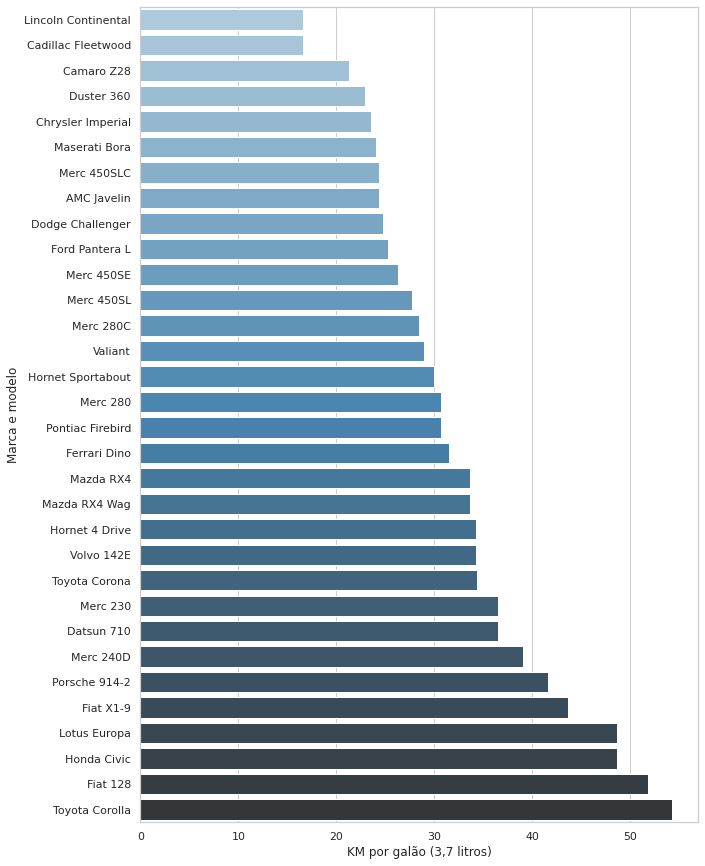

In [193]:
ax = plt.subplots(figsize = (10,15))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="KM por galão (3,7 litros)", y="Marca e modelo", data=(df_ordenado),  
                 palette="Blues_d")

## Gráfico 2 - Média de KM rodado por galão entre carro manual e automático
### (Galão equivalente á 3.7 L de gasolina)

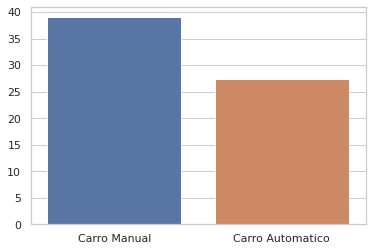

In [194]:
sns.barplot(x="carros", y = "total", data= dados)

## Gráfico 3 - Média de KM rodado por galão entre carro com 4, 6 e 8 Cilindros
### (Galão equivalente á 3.7 L de gasolina)

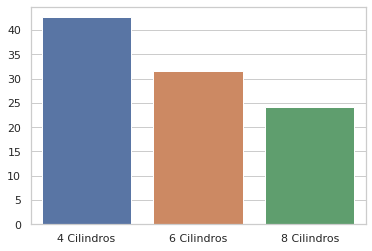

In [208]:
sns.barplot(x="carros", y = "total", data= dados_cilindro)